<a href="https://colab.research.google.com/github/siyandaV-0/llm-playground/blob/main/huggingface-nlp-pipelines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HuggingFace pipelines

For this session we head to Google Colab and use this Notebook to explore the HuggingFace High Level API, pipelines.

https://colab.research.google.com/drive/1aMaEw8A56xs0bRM4lu8z7ou18jqyybGm?usp=sharing

You can use a low cost (or free) T4 GPU runtime for this notebook - and the results look great!

There are instructions in the notebook for setting up your HuggingFace Token and including it as a secret in the notebook.

In [2]:
!pip3 install pip -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 23.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [3]:
!pip3 install -q transformers datasets diffusers

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [4]:
# Imports
import torch
from transformers import pipeline
from diffusers import DiffusionPipeline
from datasets import load_dataset
import soundfile as sf
from IPython.display import Audio

In [5]:
!nvidia-smi

Wed Dec  4 22:45:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [6]:
# Sentiment Analysis

classifier = pipeline("sentiment-analysis", device='cuda')
results = classifier(["We are very happy to show you the 🤗 Transformers library.", "We hope you don't hate it."])
print(results[0])

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

{'label': 'POSITIVE', 'score': 0.9997795224189758}


In [7]:
# Named Entity Recognition
ner = pipeline('ner', grouped_entities=True, device='cuda')
results = ner("My name is Sylvain and I work at Contrac Supply Chain")
print(results)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

[{'entity_group': 'PER', 'score': 0.9989568, 'word': 'Sylvain', 'start': 11, 'end': 18}, {'entity_group': 'ORG', 'score': 0.99702024, 'word': 'Contrac Supply Chain', 'start': 33, 'end': 53}]


/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


In [8]:
# Question Anaswering with Context
question_answerer = pipeline("question-answering", device='cuda')
question_answerer(
    question="Who is the founder of Facebook?",
    context="Mark Zuckerberg founded Facebook in 2004.",
)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

{'score': 0.997601330280304,
 'start': 0,
 'end': 15,
 'answer': 'Mark Zuckerberg'}

In [9]:
summarizer = pipeline("summarization", device='cuda')
text = """In the night I hear them talk, coldest story ever told! Somewhere far along this road he lost his soul. To a woman so heartless!
How could she be so heartless? Talking, talking, talking, talk. Please let just knock it off. They don't know what we've been through.
They dont know about me and you. I got something new to say, you just going to keep on hating me, we are just going to be enemies. I know you can't believe,
I can just leave it wrong, and you cannot make it right. I'm going to take off tonight. In to the night!
"""
results = summarizer(text)
print(results[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Your max_length is set to 142, but your input_length is only 137. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=68)


 In the night I hear them talk, coldest story ever told! Somewhere far along this road he lost his soul. To a woman so heartless! How could she be so . heartless? Please let just knock it off. They don't know what we've been through. I got something new to say .


In [10]:
# Translation
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-es-en", device='cuda')
results = translator("Ola! Como Estas, ahora voy a la restuarante a como el almuerzo")
print(results[0])

config.json:   0%|          | 0.00/1.44k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


{'translation_text': "Like these, now I'm going to the restuarante to eat lunch."}


In [11]:
# Zero Shot Classification
classifier = pipeline("zero-shot-classification", device='cuda')
results = classifier("Hugging Face's Transformer library IS AMAZING!", candidate_labels = ['technology', 'sports', 'poltics'])
print(results)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

{'sequence': "Hugging Face's Transformer library IS AMAZING!", 'labels': ['technology', 'poltics', 'sports'], 'scores': [0.9192315340042114, 0.06428292393684387, 0.016485534608364105]}


In [17]:
# Text Generation
generator = pipeline('text-generation', device='cuda')
results = generator("It's seven o'clock on the dot I'm in my drop-top cruising the streets. I got a")
print(results)

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


[{'generated_text': "It's seven o'clock on the dot I'm in my drop-top cruising the streets. I got a bit of my bearings but a lot of the gear I had at my feet stuck, you know, to an 80-ton trailer,"}]


In [20]:
# Image Generation

image_gen = DiffusionPipeline.from_pretrained( "stabilityai/stable-diffusion-2",
                                               torch_dtype = torch.float16,
                                               use_safetensors = True,
                                               variant = 'fp16').to("cuda")

text = "A class of Data Scientists learning about AI in the surreal style of the Manga Jujutsu Kaisen"
image = image_gen(prompt=text).images[0]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

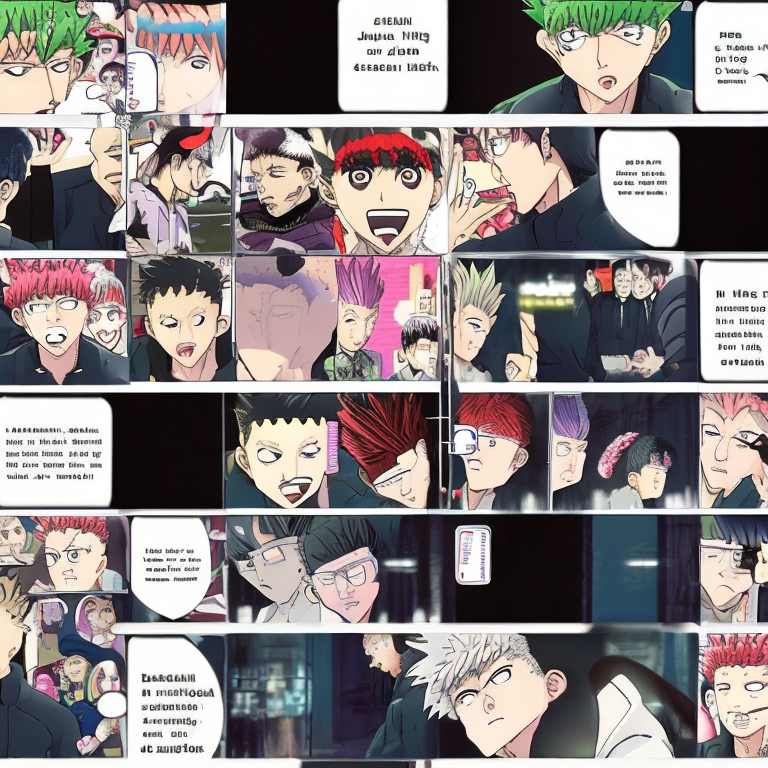

In [21]:
image

In [33]:
# Audio Generation
synthesizer = pipeline('text-to-speech', 'microsoft/speecht5_tts', device='cuda')
embeddings_dataset = load_dataset("Matthijs/cmu-arctic-xvectors", split="validation")#.take(2000)
speaker_embeddings = torch.tensor(embeddings_dataset[7306]["xvector"]).unsqueeze(0)


text = "I'm in love with a stripper!"
speech = synthesizer(text, forward_params = {'speaker_embeddings':speaker_embeddings})

sf.write('speech.wav', speech['audio'], samplerate = speech['sampling_rate'])

In [34]:
Audio('speech.wav')